In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [276]:
directory = '/Users/pault/paultangerusda drive/2020_Sync/COVID analysis (Paul Tanger)/data/SME_data/RECOVR'

In [277]:
# check specific questions
# PHP doesn't have inc6 instead inc7_2.. they all have various forms of caseid and submission date if we want later
cols = ['duration', 'country', 'inc2', 'inc3', 'inc4', ]
cols_php = cols + ['inc7_2', 'inc8']
cols_other = cols + ['inc6', 'inc8']

In [278]:
# get filenames 
df_dict = {}
for dirs, subdirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.dta'):
            # make df name
            df_name = f'df_{file[:3]}'
            # make filepath
            filepath = os.path.join(directory, file)
            # put into dict
            df_dict[df_name] = pd.io.stata.read_stata(filepath)
            # add col for country
            df_dict[df_name]['country'] = file[:3]
#             print(list(df_dict[df_name].columns))
            # only keep cols we need
            if file[:3] == 'PHP':
                filtered = df_dict[df_name].loc[:, cols_php]
                # rename col to match others
                filtered.rename(columns={'inc7_2' : 'inc6'})
                df_dict[df_name] = filtered
            else:
                filtered = df_dict[df_name].loc[:, cols_other]
                df_dict[df_name] = filtered   

In [279]:
# check sizes
for k, df in df_dict.items():
    print(df.shape)
    print(df.columns)

(1507, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1484, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1274, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1329, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1327, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1357, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1304, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')
(1389, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc7_2', 'inc8'], dtype='object')
(1633, 7)
Index(['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8'], dtype='object')


In [280]:
# check for ZMB why no to inc2?
ZMB = df_dict['df_ZMB']

In [281]:
ZMB['inc2'].unique()

[NaN, 'Yes', 'No']
Categories (2, object): ['No' < 'Yes']

In [282]:
ZMB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   duration  1274 non-null   object  
 1   country   1274 non-null   object  
 2   inc2      801 non-null    category
 3   inc3      512 non-null    category
 4   inc4      845 non-null    category
 5   inc6      748 non-null    category
 6   inc8      553 non-null    category
dtypes: category(5), object(2)
memory usage: 37.6+ KB


In [283]:
ZMB[ZMB['inc2'].notna()]

,duration,country,inc2,inc3,inc4,inc6,inc8
1,2254,ZMB,Yes,NaN,Agriculture,"Yes, Business remains open but operations have...",NaN
2,1385,ZMB,Yes,NaN,Transportation and storage,"No, temporarily or permanently closed due to f...",Less
4,1617,ZMB,No,No,NaN,NaN,NaN
5,1385,ZMB,No,No,NaN,NaN,NaN
7,1805,ZMB,No,Yes,Agriculture,NaN,NaN
...,...,...,...,...,...,...,...
1266,361,ZMB,Yes,NaN,Agriculture,"Yes, Business remains open as usual",Same
1269,284,ZMB,Yes,NaN,Retail or Wholesale,"Yes, Business remains open as usual",Same
1271,394,ZMB,No,Yes,Agriculture,NaN,NaN
1272,291,ZMB,No,No,NaN,NaN,NaN


In [284]:
ZMB[ZMB['inc2'].isna()]

,duration,country,inc2,inc3,inc4,inc6,inc8
0,1527,ZMB,NaN,NaN,Accomodation and food services,"Yes, Business remains open but operations have...",NaN
3,2126,ZMB,NaN,NaN,Agriculture,"No, temporarily or permanently closed due to f...",Less
6,1566,ZMB,NaN,NaN,Education,"No, temporarily or permanently closed due to f...",NaN
9,2013,ZMB,NaN,NaN,Agriculture,"Yes, Business remains open but operations have...",Less
11,1259,ZMB,NaN,NaN,Manufacturing,"Yes, Business remains open but operations have...",Same
...,...,...,...,...,...,...,...
1261,649,ZMB,NaN,NaN,Transportation and storage,"Yes, Business remains open as usual",More
1265,1976,ZMB,NaN,NaN,Transportation and storage,"Yes, Business remains open as usual",More
1267,349,ZMB,NaN,NaN,Other services,"Yes, Business remains open as usual",NaN
1268,512,ZMB,NaN,NaN,Other services,"Yes, Business remains open but operations have...",Same


In [285]:
# concat into one df
combined = pd.concat(df_dict.values())

In [286]:
# combined2 = pd.concat(df_dict.values(), axis=0, ignore_index=True)

In [287]:
# another way
# combined3 = pd.DataFrame.from_dict(map(dict, df_dict.values()))

In [288]:
cols = ['duration', 'country', 'inc2', 'inc3', 'inc4', 'inc6', 'inc8']

In [289]:
income_questions = combined.loc[:,cols]

In [290]:
income_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12604 entries, 0 to 1632
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  12603 non-null  object
 1   country   12604 non-null  object
 2   inc2      10093 non-null  object
 3   inc3      8371 non-null   object
 4   inc4      8940 non-null   object
 5   inc6      7916 non-null   object
 6   inc8      5587 non-null   object
dtypes: object(7)
memory usage: 787.8+ KB


In [291]:
# if answered either inc2 or inc3
to_check = income_questions.loc[((income_questions['inc2'].notna()) | (income_questions['inc3'].notna())), :]

In [292]:
ZMB_no_inc2 = to_check[to_check['country'] == 'ZMB']

In [293]:
ZMB_no_inc2[ZMB_no_inc2['inc2'] == 'No']

,duration,country,inc2,inc3,inc4,inc6,inc8
4,1617,ZMB,No,No,NaN,NaN,NaN
5,1385,ZMB,No,No,NaN,NaN,NaN
7,1805,ZMB,No,Yes,Agriculture,NaN,NaN
8,1455,ZMB,No,No,NaN,NaN,NaN
10,458,ZMB,No,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1247,1417,ZMB,No,Yes,Agriculture,NaN,NaN
1249,1192,ZMB,No,No,NaN,NaN,NaN
1263,515,ZMB,No,No,NaN,NaN,NaN
1271,394,ZMB,No,Yes,Agriculture,NaN,NaN


In [294]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10094 entries, 1 to 1632
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  10093 non-null  object
 1   country   10094 non-null  object
 2   inc2      10093 non-null  object
 3   inc3      8371 non-null   object
 4   inc4      6464 non-null   object
 5   inc6      5446 non-null   object
 6   inc8      4072 non-null   object
dtypes: object(7)
memory usage: 630.9+ KB


In [295]:
# now keep if they answered if biz is open or closed
# to_check = to_check.dropna(subset=['inc6'], axis=0)

In [296]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10094 entries, 1 to 1632
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  10093 non-null  object
 1   country   10094 non-null  object
 2   inc2      10093 non-null  object
 3   inc3      8371 non-null   object
 4   inc4      6464 non-null   object
 5   inc6      5446 non-null   object
 6   inc8      4072 non-null   object
dtypes: object(7)
memory usage: 630.9+ KB


In [297]:
ZMB_no_inc2 = to_check[to_check['country'] == 'ZMB']
ZMB_no_inc2[ZMB_no_inc2['inc2'] == 'No']

,duration,country,inc2,inc3,inc4,inc6,inc8
4,1617,ZMB,No,No,NaN,NaN,NaN
5,1385,ZMB,No,No,NaN,NaN,NaN
7,1805,ZMB,No,Yes,Agriculture,NaN,NaN
8,1455,ZMB,No,No,NaN,NaN,NaN
10,458,ZMB,No,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1247,1417,ZMB,No,Yes,Agriculture,NaN,NaN
1249,1192,ZMB,No,No,NaN,NaN,NaN
1263,515,ZMB,No,No,NaN,NaN,NaN
1271,394,ZMB,No,Yes,Agriculture,NaN,NaN


In [298]:
ZMB_no_inc2

,duration,country,inc2,inc3,inc4,inc6,inc8
1,2254,ZMB,Yes,NaN,Agriculture,"Yes, Business remains open but operations have...",NaN
2,1385,ZMB,Yes,NaN,Transportation and storage,"No, temporarily or permanently closed due to f...",Less
4,1617,ZMB,No,No,NaN,NaN,NaN
5,1385,ZMB,No,No,NaN,NaN,NaN
7,1805,ZMB,No,Yes,Agriculture,NaN,NaN
...,...,...,...,...,...,...,...
1266,361,ZMB,Yes,NaN,Agriculture,"Yes, Business remains open as usual",Same
1269,284,ZMB,Yes,NaN,Retail or Wholesale,"Yes, Business remains open as usual",Same
1271,394,ZMB,No,Yes,Agriculture,NaN,NaN
1272,291,ZMB,No,No,NaN,NaN,NaN


In [299]:
# now keep if they answered how much they are working now
to_check = to_check.dropna(subset=['inc8'], axis=0)

In [300]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4072 entries, 1 to 1622
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  4072 non-null   object
 1   country   4072 non-null   object
 2   inc2      4072 non-null   object
 3   inc3      2792 non-null   object
 4   inc4      3834 non-null   object
 5   inc6      3396 non-null   object
 6   inc8      4072 non-null   object
dtypes: object(7)
memory usage: 254.5+ KB


In [301]:
to_check.head()

,duration,country,inc2,inc3,inc4,inc6,inc8
1,21.82,COL,Yes,NaN,Mining,Yes,Less
9,16.78,COL,Yes,NaN,Retail trade and vehicle reparation,No,Less
14,22.13,COL,Yes,NaN,Manufacturing Industry,No,Less
77,41.20,COL,Yes,NaN,Low skilled services (e.g. household workers),No,Less
84,17.30,COL,Yes,NaN,Retail trade and vehicle reparation,Yes,Less


In [302]:
# how many answered for type of biz
to_check2 = to_check.dropna(subset=['inc4'], axis=0)
to_check2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834 entries, 1 to 1622
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  3834 non-null   object
 1   country   3834 non-null   object
 2   inc2      3834 non-null   object
 3   inc3      2556 non-null   object
 4   inc4      3834 non-null   object
 5   inc6      3195 non-null   object
 6   inc8      3834 non-null   object
dtypes: object(7)
memory usage: 239.6+ KB


In [303]:
# rename cols
to_check2.columns = ['duration', 'country', 'run_biz_feb', 'work_fam_biz_feb', 'main_job_sector', 'biz_still_open', 'worked_past_week_compared_feb']

In [304]:
to_check2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834 entries, 1 to 1622
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   duration                       3834 non-null   object
 1   country                        3834 non-null   object
 2   run_biz_feb                    3834 non-null   object
 3   work_fam_biz_feb               2556 non-null   object
 4   main_job_sector                3834 non-null   object
 5   biz_still_open                 3195 non-null   object
 6   worked_past_week_compared_feb  3834 non-null   object
dtypes: object(7)
memory usage: 239.6+ KB


In [305]:
# to_check2.to_csv(directory + '_raw.csv', index=False)

In [306]:
final = to_check2.drop('duration', axis=1)

In [307]:
final.head()

,country,run_biz_feb,work_fam_biz_feb,main_job_sector,biz_still_open,worked_past_week_compared_feb
1,COL,Yes,NaN,Mining,Yes,Less
9,COL,Yes,NaN,Retail trade and vehicle reparation,No,Less
14,COL,Yes,NaN,Manufacturing Industry,No,Less
77,COL,Yes,NaN,Low skilled services (e.g. household workers),No,Less
84,COL,Yes,NaN,Retail trade and vehicle reparation,Yes,Less


In [308]:
# these cols still have some codes we need to map:
# main_job_sector (CDI) biz_still_open (RWA)
# also, GHN, RWA, ZMB don't have "no" for inc2

In [309]:
# get counts for some simple answers
grouped = final.groupby('country')['run_biz_feb'].value_counts()
grouped

country  run_biz_feb
BFA      Yes            377
         No             227
CDI      Yes            165
         No             112
COL      Yes             76
         No              29
GHN      Yes            324
         No               8
MEX      No             519
         Yes            415
PHP      No             317
         Yes            203
RWA      Yes            262
SLE      Yes            327
         No             273
ZMB      Yes            200
Name: run_biz_feb, dtype: int64

In [310]:
# same as above
# grouped = final.groupby(['country','run_biz_feb'])['run_biz_feb'].count()
# grouped
grouped = final.groupby(['country','biz_still_open'])['biz_still_open'].agg('count').reset_index(name = 'counts') # excludes na
type(grouped)
grouped

,country,biz_still_open,counts
0,BFA,No,116
1,BFA,Yes,482
2,CDI,No,30
3,CDI,Yes,247
4,COL,Doesn´t apply,1
5,COL,No,35
6,COL,Yes,68
7,GHN,"No, permanently closed due to challenges relat...",2
8,GHN,"No, temporarily closed by government mandate",4
9,GHN,"No, temporarily closed due to challenges relat...",23


In [311]:
# get percents of total
pd.options.display.float_format = '{:,.3f}'.format
grouped = final.groupby(['country'])['biz_still_open'].value_counts(normalize=True).reset_index(name = 'counts')
type(grouped)
grouped

,country,biz_still_open,counts
0,BFA,Yes,0.806
1,BFA,No,0.194
2,CDI,Yes,0.892
3,CDI,No,0.108
4,COL,Yes,0.654
5,COL,No,0.337
6,COL,Doesn´t apply,0.010
7,GHN,"Yes, Business remains open as usual",0.394
8,GHN,"Yes, Business remains open but operations have...",0.320
9,GHN,"Yes, Farming work has not changed",0.146


In [312]:
pd.options.display.float_format = '{:,.3f}'.format
grouped = final.groupby(['country'])['run_biz_feb'].value_counts(normalize=True).reset_index(name = 'counts')
type(grouped)
grouped

,country,run_biz_feb,counts
0,BFA,Yes,0.624
1,BFA,No,0.376
2,CDI,Yes,0.596
3,CDI,No,0.404
4,COL,Yes,0.724
5,COL,No,0.276
6,GHN,Yes,0.976
7,GHN,No,0.024
8,MEX,No,0.556
9,MEX,Yes,0.444


In [313]:
# final.groupby(['country']).agg(lambda x: x.value_counts(normalize=True).to_list())
pcts_dicts = final.groupby(['country']).agg(lambda x: x.value_counts(normalize=True).to_dict())

In [314]:
pcts_dicts['run_biz_feb'].apply(pd.Series)

,Yes,No
country,,
BFA,0.624,0.376
CDI,0.596,0.404
COL,0.724,0.276
GHN,0.976,0.024
MEX,0.444,0.556
PHP,0.390,0.610
RWA,1.000,nan
SLE,0.545,0.455
ZMB,1.000,nan


In [315]:
# with crosstab approach
pd.crosstab(index=final['country'], columns=final['run_biz_feb'], normalize='index')

run_biz_feb,No,Yes
country,,
BFA,0.376,0.624
CDI,0.404,0.596
COL,0.276,0.724
GHN,0.024,0.976
MEX,0.556,0.444
PHP,0.610,0.390
RWA,0.000,1.000
SLE,0.455,0.545
ZMB,0.000,1.000


In [316]:
# pd.crosstab(index=[final['country']], columns=[final['run_biz_feb']], normalize='index')
pd.crosstab(index=[final['country'], final['run_biz_feb']], columns=[final['run_biz_feb']])

run_biz_feb           No  Yes
country run_biz_feb          
BFA     No           227    0
        Yes            0  377
CDI     No           112    0
        Yes            0  165
COL     No            29    0
        Yes            0   76
GHN     No             8    0
        Yes            0  324
MEX     No           519    0
        Yes            0  415
PHP     No           317    0
        Yes            0  203
RWA     Yes            0  262
SLE     No           273    0
        Yes            0  327
ZMB     Yes            0  200

In [317]:
# just groupby country somehow?
pd.crosstab(**final.melt(var_name='columns', value_name='index'), normalize=True)

columns,biz_still_open,country,main_job_sector,run_biz_feb,work_fam_biz_feb,worked_past_week_compared_feb
index,,,,,,
(Street) Vendor,0.000,0.000,0.003,0.000,0.000,0.000
-666,0.000,0.000,0.003,0.000,0.000,0.000
-999,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.004,0.000,0.000,0.000
1 -666,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...
"Yes, Business remains open but operations have been reduced",0.022,0.000,0.000,0.000,0.000,0.000
"Yes, Business remains open but some or many workers have been laid off",0.003,0.000,0.000,0.000,0.000,0.000
"Yes, Business remains open but some/many people are working from home",0.009,0.000,0.000,0.000,0.000,0.000


In [319]:
# with melt
final_melted = final.melt(id_vars="country")
# save this long format for R to plot
final_melted.to_csv(directory + '_final_melted_for_R.csv', index=False)

In [218]:
final_melted

,country,variable,value
0,COL,run_biz_feb,Yes
1,COL,run_biz_feb,Yes
2,COL,run_biz_feb,Yes
3,COL,run_biz_feb,Yes
4,COL,run_biz_feb,Yes
...,...,...,...
19165,GHN,worked_past_week_compared_feb,Fewer
19166,GHN,worked_past_week_compared_feb,Same
19167,GHN,worked_past_week_compared_feb,Same
19168,GHN,worked_past_week_compared_feb,Fewer


In [253]:
# final_melted.pivot_table(index=['country', 'variable'], aggfunc='count').reset_index()
final_melted.pivot_table(index=[pd.Grouper(key='country'), 'value'], columns=['variable'], aggfunc='count').reset_index()

,country,value
variable,,
0,BFA,(Street) Vendor
1,BFA,Accomodation and food services
2,BFA,Agriculture
3,BFA,Construction or utilities
4,BFA,Education
...,...,...
239,ZMB,"Yes, Business remains open as usual"
240,ZMB,"Yes, Business remains open but operations have..."
241,ZMB,"Yes, Business remains open but some or many wo..."


In [254]:
# only look at groups that had a biz in feb
feb_biz = final[final['run_biz_feb'] == 'Yes']

In [255]:
feb_biz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 1 to 1622
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   country                        2349 non-null   object
 1   run_biz_feb                    2349 non-null   object
 2   work_fam_biz_feb               1072 non-null   object
 3   main_job_sector                2349 non-null   object
 4   biz_still_open                 2124 non-null   object
 5   worked_past_week_compared_feb  2349 non-null   object
dtypes: object(6)
memory usage: 128.5+ KB


In [266]:
pct_biz_open = pd.crosstab(index=final['country'], columns=final['biz_still_open'], normalize='index') * 100
# pct_biz_open = pct_biz_open.reset_index()

In [261]:
# pct_biz_open.to_csv(directory + '_pct_biz_open.csv', index=False)

In [267]:
pct_biz_open

biz_still_open,-999,1,1 2,1 2 3,11,2,3,4,5,5 6,5 6 7,5 6 7 9,5 7,6,6 -888,6 7,6 7 8,6 8,6 9,7,8,9,Doesn´t apply,No,"No, permanently closed due to challenges related to the COVID-19 outbreak","No, temporarily closed by government mandate","No, temporarily closed due to challenges related to the COVID-19 outbreak","No, temporarily or permanently closed due to factors unrelated to the COVID 19 o","No, temporarily or permanently closed due to factors unrelated to the COVID 19 outbreak",Yes,"Yes, Business remains open as usual","Yes, Business remains open but operation has been reduced","Yes, Business remains open but operations have been reduced","Yes, Business remains open but some or many workers have been laid off","Yes, Business remains open but some/many people are working from home","Yes, Farming work has not changed"
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BFA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.398,0.000,0.000,0.000,0.000,0.000,80.602,0.000,0.000,0.000,0.000,0.000,0.000
CDI,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.830,0.000,0.000,0.000,0.000,0.000,89.170,0.000,0.000,0.000,0.000,0.000,0.000
COL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.962,33.654,0.000,0.000,0.000,0.000,0.000,65.385,0.000,0.000,0.000,0.000,0.000,0.000
GHN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.621,1.242,7.143,1.242,0.000,0.000,39.441,0.000,31.988,0.932,2.795,14.596
MEX,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.771,18.591,19.746,0.000,1.848,0.000,13.741,19.977,0.000,4.503,18.360,0.462
RWA,0.382,3.053,1.145,1.145,0.763,4.580,1.145,1.145,5.725,1.527,0.382,0.382,0.382,31.679,0.382,1.527,0.382,0.382,0.382,1.145,17.939,24.427,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
SLE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.530,2.650,5.300,1.590,0.000,0.000,25.795,0.000,55.830,4.240,2.473,1.590
ZMB,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,7.000,3.500,0.000,0.000,53.500,0.000,21.500,1.000,1.500,11.500


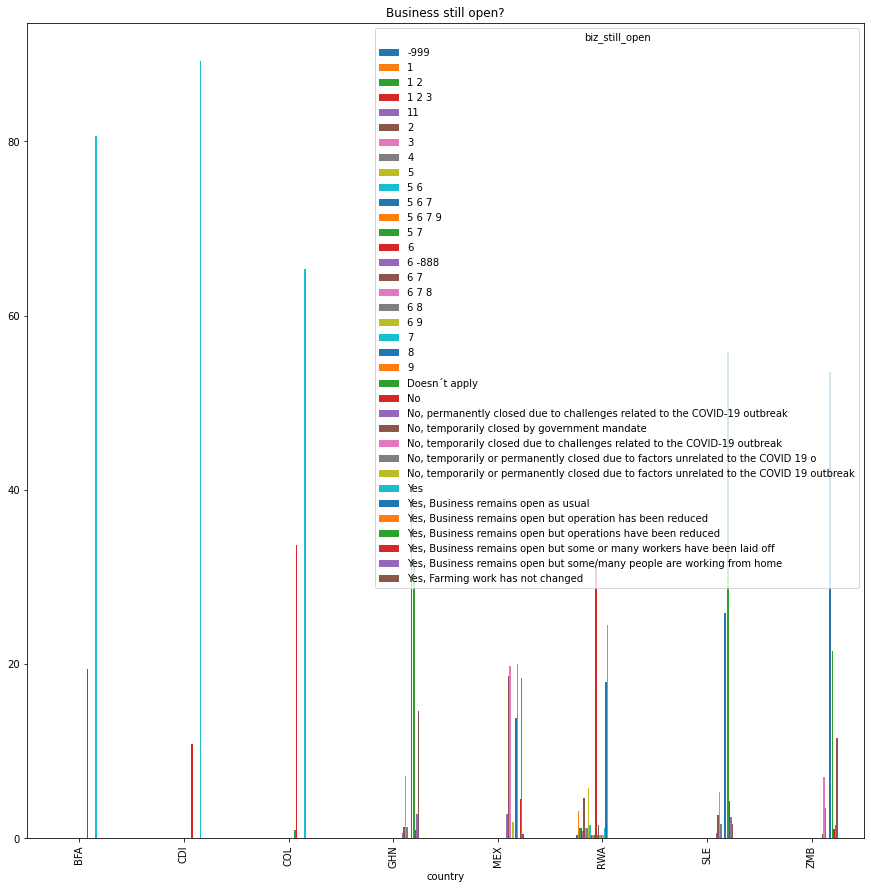

In [274]:
fig, ax = plt.subplots(1, figsize=(15,15))
pct_biz_open.plot.bar(title='Business still open?', legend='top', ax=ax);